# Supervised Learning

## 1) Regression

### 1-1) Linear Regression from scratch

In [3]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Step 1. Data Creation

## data ( height and weight of  adults and children)

In [32]:
m = 100
1/m 

0.01

In [4]:
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])

adult_dataset = np.concatenate( (adult_weight, adult_height) , axis = 1)

print(adult_dataset.shape)
print(adult_dataset[:5])

(100, 2)
[[ 75.18681813 172.03639277]
 [ 70.83857516 166.93688604]
 [ 69.73844123 177.57417861]
 [ 74.67354661 182.93296724]
 [ 71.56396679 179.19935786]]


In [5]:
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

child_dataset = np.concatenate( (child_weight, child_height) , axis = 1)

print(child_dataset.shape)
print(child_dataset[:5])

(100, 2)
[[ 24.70852054 130.18915659]
 [ 30.5073394  118.63774692]
 [ 29.10874283 115.64305723]
 [ 23.39564788 115.62491189]
 [ 34.38205601 122.49338784]]


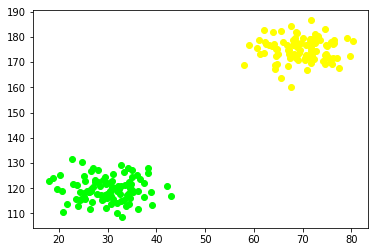

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(adult_dataset[:,0], adult_dataset[:,1], c=np.array([(1, 1, 0)]))
ax1.scatter(child_dataset[:,0], child_dataset[:,1], c=np.array([(0, 1, 0)]))
plt.show()

## Label

In [7]:
adult_label = np.ones( shape=[m, 1] )
child_label = np.zeros( shape=[m, 1] )
label = np.concatenate( (adult_label, child_label) )
print('label의 shape' , label.shape)
print(label[:10])

label의 shape (200, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Data + Label

In [8]:
total_dataset = np.concatenate((adult_dataset , child_dataset))
total_dataset = np.concatenate( (total_dataset, label), axis = 1  )

np.random.shuffle(total_dataset) # Shuffle dataset
print(total_dataset[:10])
print(total_dataset.shape)

[[ 32.44779258 117.543586     0.        ]
 [ 30.85390554 122.74618139   0.        ]
 [ 69.37115213 174.80023297   1.        ]
 [ 25.27622402 122.91774528   0.        ]
 [ 75.03380257 176.20591023   1.        ]
 [ 29.08289283 123.10097975   0.        ]
 [ 72.25664742 179.01240919   1.        ]
 [ 34.72656291 121.51917882   0.        ]
 [ 74.22908862 170.34173458   1.        ]
 [ 25.03418461 118.03407253   0.        ]]
(200, 3)


## simple scaling of dataset

In [9]:
weight_mean= total_dataset[:, 0].mean()
height_mean= total_dataset[:, 1].mean()
total_dataset[:, 0] /= weight_mean
total_dataset[:, 1] /= height_mean

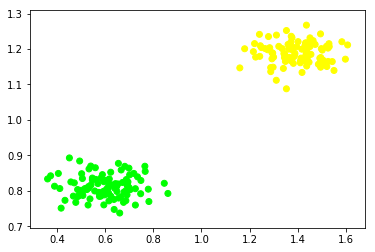

In [10]:
total_dataset.shape

fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)
plt.show()

# Step 2. Model definition

In [93]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b
    return pred

In [54]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [47]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [75]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum( x*(y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum( y  - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [61]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [76]:
# initialization of weights and bias
w = [[0, 0]]
b = 0

In [130]:
for i in range(10000):
    w, b = update(x, w, b, y, alpha=0.01)
    if i % 100 == 0:
        print ('cost =',cost(x, w, b, y))
        print ('w =',w)
        print ('b =',b)
        print ('\n')

cost = 2.178059992926824
w = [[12.80235456  1.06240331]]
b = [-13.72956826]


cost = 2.1761903048434106
w = [[12.80502388  1.06305112]]
b = [-13.73290805]


cost = 2.1743240591549577
w = [[12.80769061  1.06369853]]
b = [-13.73624484]


cost = 2.1724612461440236
w = [[12.81035475  1.06434555]]
b = [-13.73957862]


cost = 2.170601856130063
w = [[12.81301631  1.06499217]]
b = [-13.74290941]


cost = 2.168745879469312
w = [[12.81567529  1.06563841]]
b = [-13.74623721]


cost = 2.1668933065545852
w = [[12.8183317   1.06628425]]
b = [-13.74956202]


cost = 2.1650441278150994
w = [[12.82098554  1.06692969]]
b = [-13.75288385]


cost = 2.1631983337163123
w = [[12.82363681  1.06757475]]
b = [-13.75620271]


cost = 2.1613559147597314
w = [[12.82628553  1.06821942]]
b = [-13.75951859]


cost = 2.1595168614827625
w = [[12.8289317   1.06886369]]
b = [-13.76283152]


cost = 2.157681164458533
w = [[12.83157532  1.06950758]]
b = [-13.76614149]


cost = 2.155848814295719
w = [[12.83421639  1.07015108]]

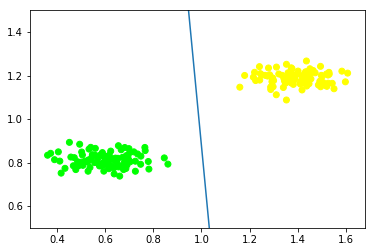

In [131]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)


p1 = np.array([0, -b/w[0, 1]])
p2 = np.array([-b/w[0, 0], 0])
coefficients = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) 
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0.5, 1.5)
y_axis = polynomial(x_axis)
ax1.set_ylim(0.5, 1.5)
ax1.plot(x_axis, y_axis)

plt.show()
